In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction to Statistical Learning Theory

This subsection provides a very brief introduction to **statistical learning theory** [42, 44]. Statistical learning theory-based modeling aims at choosing a model from the hypothesis space that is closest (with respect to some error measure) to the underlying function in the target space.

## Errors in SVM Modeling

Errors in SVM modeling arise from two cases [19]:

- **Approximation Error**: This error arises when there is a poor choice of the hypothesis space that is smaller than the target space, leading to a large approximation error. This is referred to as **model mismatch**.
- **Estimation Error**: This error occurs due to the learning procedure, which results in selecting a non-optimal model from the hypothesis space.

To choose the best available approximation to the supervisor’s response, it is important to measure the loss or discrepancy \(L(y, f(w, x))\) between the response \(y\) of the supervisor to a given input \(x\) and the response \(f(w, x)\) provided by the learning machine.

## Risk Function in SVM

Given a training set of \(N\) independent observations \((x_1, y_1), \ldots, (x_N, y_N)\), we would like to find the function \(f\) such that the expected value of the loss, called the **risk function**, is minimized:

$$
R(w) = \int L(y, f(w, x)) dP(x, y),
$$

where \(P(x, y)\) is the joint probability distribution. The goal of SVM is to minimize the risk function \(R(w)\) over the class of functions \(f(w, x)\), where \(w \in W\).

In geometry a hyperplane is a subspace whose dimension is one less than that of its ambient space.For example, if a space is three-dimensional then its hyperplanes are the two-dimensional planes,while if the space is two-dimensional, its hyperplanes are the one-dimensional lines.


# Empirical Risk Minimization (ERM) in Statistical Learning Theory

The problem with statistical learning theory is that the **joint probability distribution** \(P(x, y)\), which is \(P(y|x)P(x)\), is unknown. The only available information is the training set \(\{(x_1, y_1), \ldots, (x_N, y_N)\}\).

## Empirical Risk Function

To address this problem, the incalculable risk function \(R(w)\) should be approximated by the empirical risk function:

$$
R_{\text{emp}}(w) = \frac{1}{N} \sum_{i=1}^{N} L(y_i, f(w, x_i))
$$

This empirical risk function can be constructed using the training set \(\{(x_1, y_1), \ldots, (x_N, y_N)\}\). In this equation, the Boolean function \(f(w, x_i)\) on the input feature \(x_i\) and a set of Boolean functions on the input features \(\{f(w, x_i), w \in W, x_i \in X\}\) are known as the **hypothesis** and **hypothesis space**, respectively.

## Empirical Risk Minimization (ERM) Principle

The **ERM principle** is to minimize \(R_{\text{emp}}(w)\) over the set \(w \in W\), resulting in a risk \(R(w^*_i)\) that is close to its minimum.

### Questions for Evaluating ERM Soundness

The soundness of the ERM principle can be evaluated by answering the following two questions [42]:

1. **Uniform Convergence**: Does the empirical risk \(R_{\text{emp}}(w)\) converge uniformly to the actual risk \(R(w)\) over the full set \(f(w, x)\), \(w \in W\), namely:
   
   $$
   \text{Prob}\left(\sup_{w \in W} |R(w) - R_{\text{emp}}(w)| > \epsilon \right) \rightarrow 0 \quad \text{as} \quad N \rightarrow \infty.
   $$
   
2. **Rate of Convergence**: What is the rate of convergence?

### Theory of Uniform Convergence

The theory of uniform convergence of empirical risk to actual risk includes necessary and sufficient conditions as well as bounds for the rate of convergence. These bounds, which are independent of the distribution function \(P(x, y)\), are based on the **Vapnik–Chervonenkis (VC) dimension** of the set of functions \(f(w, x)\) implemented by the learning machine.

## VC Dimension and Shattering

For a set of functions \(\{f(w)\}\), where \(w\) is a generic set of parameters, a choice of \(w\) specifies a particular function and can be defined for various classes of function \(f\).

Consider the case where the functions correspond to two-class pattern recognition, so that \(f(w, x) \in \{-1, 1\}\), \(\forall w, x\).

If a given set of \(N\) data points can be labeled in all possible \(2^N\) ways, and for each labeling, a member of the set \(\{f(w)\}\) with correctly assigned labels can be found, then the set of points is said to be **shattered** by the set of functions.

### Example: 2D Space and Oriented Straight Lines

Suppose the space in which the data live is \(\mathbb{R}^2\), and the set \(\{f(w)\}\) consists of oriented straight lines. For a given line, all points on one side are assigned to class 1, and all points on the other side are assigned to class -1, as shown in Fig. 8.1.

- One can find at least one set of 3 points in 2D, all of whose \(2^3 = 8\) possible labelings can be separated by some hyperplane.
- Any set of 4 points, all of whose \(2^4 = 16\) possible labelings, are not separable by hyperplanes.

This illustrates the concept of VC dimension and how it relates to the capacity of a set of functions to shatter a set of data points.


![VC-Dimension Diagram](svm1.png)
Figure 1 - Three points in R2, shattered by oriented lines. The arrow points to the side with the
points labeled black
# VC-Dimension and Learning Problems

Suppose we have a dataset containing \(N\) points. These \(N\) points can be labeled in \(2^N\) ways as positive \("+\)" and negative \("−"\). Therefore, \(2^N\) different learning problems can be defined by \(N\) data points. If, for any of these problems, we can find a hypothesis \(h \in H\) that separates the positive examples from the negative, then we say \(H\) shatters \(N\) points. In other words, any learning problem definable by \(N\) examples can be learned without error by a hypothesis drawn from \(H\).

## Definitions

### Definition 8.1: Indicator Function [12]

Let \(D\) be a \(2^n\) full factorial design with levels \(-1\) and \(+1\), and let a fractional factorial design \(F\) be a subset of \(D\). The **indicator function** \(F\) of its fraction \(F\) is defined on \(D\) as follows:

$$
F(x) = 
\begin{cases} 
+1 & \text{if } x \in F; \\
-1 & \text{if } x \in D \setminus F.
\end{cases}
$$

### Definition 8.2: VC-Dimension [42]

The **VC-dimension** of a set of indicator functions \(f(w, x)\), where \(w \in W\), is the maximal number \(h\) of vectors that can be shattered in all possible \(2^h\) ways by \(f(w, x)\), where \(w \in W\).

For example, \(h = n + 1\) for linear decision rules in \(n\)-dimensional space, since they can shatter at most \(n + 1\) points.

## VC-Dimension and ERM Consistency

It is well-known [45] that the finiteness of the VC-dimension of the set of indicator functions implemented by the learning machine forms the necessary and sufficient condition for consistency of the **ERM method** independent of the probability measure. The finiteness of VC-dimension also implies fast convergence.

## Theorem 8.1 ([6])

Consider some set of \(m\) points in \(\mathbb{R}^n\). Choose any one of the points as the origin. Then the \(m\) points can be shattered by oriented hyperplanes if and only if the position vectors of the remaining points are linearly independent.

## Corollary 8.1 ([6])

The VC-dimension of the set of oriented hyperplanes in \(\mathbb{R}^n\) is \(n + 1\), since we can always choose \(n + 1\) points and then choose one of the points as the origin, such that the position vectors of the remaining \(n\) points are linearly independent. However, we can never choose \(n + 2\) such points, as no \(n + 1\) vectors in \(\mathbb{R}^n\) can be linearly independent.


Indicator Function Output: [ 1  1 -1 -1]


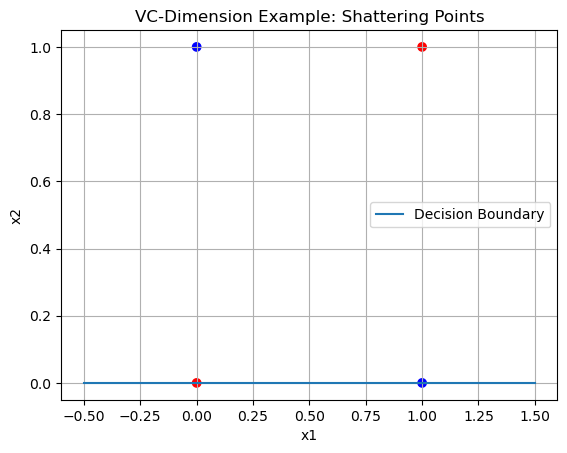

Empirical Risk: 0.25


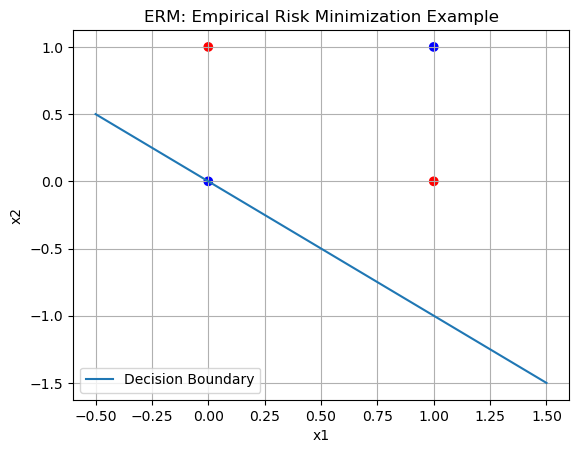

In [1]:
import numpy as np

# Define the indicator function
def indicator_function(D, F):
    """
    Returns +1 if x is in F, otherwise -1.
    D: Full factorial design (list of all possible points)
    F: Fraction of the design (subset of D)
    """
    return np.array([1 if x in F else -1 for x in D])

# Example: Full factorial design and its fraction
D = [(1, 1), (-1, 1), (1, -1), (-1, -1)]
F = [(1, 1), (-1, 1)]

indicator = indicator_function(D, F)
print("Indicator Function Output:", indicator)

# VC dimension example
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Example points in 2D
points = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
labels = np.array([1, 1, -1, -1])  # Labels for shattering

# Train a linear classifier (Perceptron)
clf = Perceptron()
clf.fit(points, labels)

# Plot points and decision boundary
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='bwr')
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = -(clf.coef_[0][0] * x_vals + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(x_vals, y_vals, label="Decision Boundary")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('VC-Dimension Example: Shattering Points')
plt.grid(True)
plt.show()
# Empirical Risk Minimization (ERM)
from sklearn.metrics import zero_one_loss

# Synthetic data for ERM
X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
y = np.array([1, 1, -1, -1])

# Train the classifier (ERM)
clf = Perceptron()
clf.fit(X, y)

# Predict and calculate empirical risk
predictions = clf.predict(X)
empirical_risk = zero_one_loss(y, predictions)

print(f'Empirical Risk: {empirical_risk}')

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = -(clf.coef_[0][0] * x_vals + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(x_vals, y_vals, label="Decision Boundary")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('ERM: Empirical Risk Minimization Example')
plt.grid(True)
plt.show()


## Linear Support Vector Machines

We discuss linear SVMs in two cases: the separable case and the nonseparable case.

### The Separable Case

Consider first the simplest case: linear machines trained on separable data. We are given the labeled training data \(\{x_i , y_i\}\) with \(i = 1, \dots, N\), \(y_i \in \{-1, +1\}\), \(x_i \in \mathbb{R}^n\). Suppose we have a "separating hyperplane" which separates the positive from the negative data samples. The points \(x\) on the hyperplane satisfy:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

where \(\mathbf{w}\) is normal to the hyperplane, \(\frac{|b|}{\|\mathbf{w}\|_2}\) is the perpendicular distance from the hyperplane to the origin, and \(\|\mathbf{w}\|_2\) is the Euclidean norm of \(\mathbf{w}\).

**Lemma 8.1 ([6])**: Two sets of points in \(\mathbb{R}^n\) may be separated by a hyperplane if and only if the intersection of their convex hulls is empty.

Let \(d_+\) and \(d_-\) be the shortest distances from the separating hyperplane to the closest positive and negative data samples, respectively. Then, the "margin" of a separating hyperplane can be defined as \(d_+ + d_-\).

For the linearly separable case, the support vector algorithm aims at finding the separating hyperplane with the largest margin \(d_+ + d_-\). To achieve this, all the training data must satisfy the following constraints:

$$
\mathbf{w}^T \mathbf{x}_i + b \geq +1, \quad \text{for} \ y_i = +1,
$$

$$
\mathbf{w}^T \mathbf{x}_i + b \leq -1, \quad \text{for} \ y_i = -1.
$$

These two constraints can be combined into one set of inequality constraints:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1 \geq 0, \quad \forall \ i = 1, \dots, N.
$$

Clearly, the points satisfying the equality in the first constraint lie on the hyperplane \(H_1 : \mathbf{w}^T \mathbf{x} + b = 1\) with normal vector \(\mathbf{w}\) and perpendicular distance from the origin \(\frac{|1 - b|}{\|\mathbf{w}\|_2}\). Similarly, the points satisfying the equality in the second constraint lie on the hyperplane \(H_2 : \mathbf{w}^T \mathbf{x} + b = -1\) with the same normal vector \(\mathbf{w}\) and perpendicular distance from the origin \(\frac{|-1 - b|}{\|\mathbf{w}\|_2}\). Therefore, \(d_+ = d_- = \frac{1}{\|\mathbf{w}\|_2}\) and the margin is simply \(\frac{2}{\|\mathbf{w}\|_2}\).

Since \(H_1\) and \(H_2\) share the same normal vector, they are parallel, and no training points fall between them. Thus, the pair of hyperplanes \((H_1, H_2)\) which gives the maximum margin is the solution.


## Linear Support Vector Machines

### The Separable Case

The margin can be found by minimizing:

$$
\frac{1}{2} \|\mathbf{w}\|_2^2
$$ 

subject to the constraints:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1 \geq 0, \quad \forall i = 1, \dots, N.
$$

This leads to the constrained optimization problem:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|_2^2,
$$

subject to:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, \dots, N.
$$

Using the Lagrange multiplier method, the unconstrained primal optimization problem is given by:

$$
\min_{\mathbf{w}, b, \alpha} \, L_P(\mathbf{w}, b, \alpha) = \frac{1}{2} \|\mathbf{w}\|_2^2 - \sum_{i=1}^{N} \alpha_i y_i (\mathbf{w}^T \mathbf{x}_i + b) + \sum_{i=1}^{N} \alpha_i,
$$

where the Lagrange multipliers \( \alpha_i \geq 0 \) for all \( i = 1, \dots, N \).

From the first-order optimality conditions:

$$
\frac{\partial L_P}{\partial \mathbf{w}} = 0, \quad \frac{\partial L_P}{\partial b} = 0,
$$

we get:

$$
\mathbf{w} = \sum_{i=1}^{N} \alpha_i y_i \mathbf{x}_i,
$$

and:

$$
\sum_{i=1}^{N} \alpha_i y_i = 0.
$$

Substituting these into the primal optimization problem, we get the dual objective function:

$$
L_D(\alpha) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j.
$$

Thus, the Wolfe dual optimization problem is:

$$
\max_{\alpha} \, W(\alpha) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j,
$$

subject to:

$$
\sum_{i=1}^{N} \alpha_i y_i = 0, \quad \alpha_i \geq 0, \quad \forall i = 1, \dots, N.
$$

### The Nonseparable Case

For nonseparable data, we relax the constraints by introducing slack variables \( \xi_i \) such that:

$$
\mathbf{w}^T \mathbf{x}_i + b \geq 1 - \xi_i, \quad \text{for} \, y_i = +1,
$$

and:

$$
\mathbf{w}^T \mathbf{x}_i + b \leq -1 + \xi_i, \quad \text{for} \, y_i = -1,
$$

with \( \xi_i \geq 0 \) for all \( i = 1, \dots, N \).

The primal minimization problem is now:

$$
\min_{\mathbf{w}, b, \xi, \alpha, C} \, L_P(\mathbf{w}, b, \xi, \alpha, C) = \frac{1}{2} \|\mathbf{w}\|_2^2 + C \sum_{i=1}^{N} \xi_i - \sum_{i=1}^{N} \alpha_i y_i (\mathbf{w}^T \mathbf{x}_i + b),
$$

subject to:

$$
0 \leq \alpha_i \leq C, \quad \forall i = 1, \dots, N.
$$

By the first-order optimality conditions:

$$
\frac{\partial L_P}{\partial \mathbf{w}} = 0, \quad \frac{\partial L_P}{\partial \xi} = 0, \quad \frac{\partial L_P}{\partial b} = 0,
$$

we get:

$$
\mathbf{w} = \sum_{i=1}^{N} \alpha_i y_i \mathbf{x}_i,
$$

$$
\sum_{i=1}^{N} \alpha_i y_i = 0, \quad \sum_{i=1}^{N} \xi_i = 0.
$$


## Wolfe Dual Optimization Problem

By substituting equations (8.1.21) and (8.1.22) into (8.1.19), and applying the constraints (8.1.20) and (8.1.23), we can eliminate \( \xi \) and \( C \) from the loss function to obtain:

$$
\max_{\alpha} \left\{ \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j \right\},
$$

subject to:

$$
0 \leq \alpha_i \leq C, \quad i = 1, \dots, N,
$$

and

$$
\sum_{i=1}^{N} \alpha_i y_i = 0,
$$

This is known as the Wolfe dual optimization problem for finding \( \alpha \).


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (for demonstration, using Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binary classification: class 0 vs class 1
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Coefficients: [[ 0.04639127 -0.52086366  1.00297397  0.46410058]]
Intercept: [-1.45419676]


In [4]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (using Iris dataset for demonstration)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binary classification: class 0 vs class 1
X = X[y != 2]
y = y[y != 2]

# Add some noise to make the data non-separable
np.random.seed(42)
noise = np.random.randn(X.shape[0], X.shape[1])  # Add noise with the same number of features
X = np.concatenate((X, noise), axis=1)  # Concatenate along the feature axis

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear SVM with soft margin
model = SVC(kernel='linear', C=100.0)  # Large C for less margin violation
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Coefficients: [[ 0.14880614 -0.40998936  0.81176861  0.40938028 -0.06348737  0.12820658
   0.02294892  0.02051087]]
Intercept: [-1.95415139]


# Reproducing Kernel and Mercer Kernel

## Reproducing Kernel Hilbert Space

Consider how a linear SVM is generalized to the case where the decision function \( f(x) \), whose sign represents the class assigned to data point \( x \), is not a linear function of the data \( x \).

### Definition 8.3 (Reproducing Kernel Hilbert Space)
A **reproducing kernel Hilbert space (RKHS)** is a Hilbert space \( \mathcal{H} \) of real-valued functions on a compact domain \( X \) with the reproducing property that for \( f \in \mathcal{H} \), and each \( x \in X \), there exists \( M_x \), not depending on \( f \), such that:

$$
F_x[f] = f(x) = \langle f(\cdot), K_x(\cdot) \rangle \leq M_x \|f\|_{\mathcal{H}},
$$

for all \( f \in \mathcal{H} \). 

Here, \( F_x[f] \) is called the evaluation functional of \( f \). The reproducing property means that the inner product of a function \( f \) and a kernel function \( K_x \), \( \langle f(\cdot), K_x(\cdot) \rangle \), is \( f(x) \) in the RKHS. The function \( K_x(\cdot) \) is called the **reproducing kernel** of \( f \) for the RKHS \( \mathcal{H} \).

### Kernel Function
A function \( K(x, y) \) is a two-variable function defined as:

$$
K(x, y) = K_x(y).
$$

### Definition 8.4 (Gram Matrix)
Given a kernel \( K(x, y) \) and patterns \( x_1, \ldots, x_N \in X \), where \( X \) is a closed subset of \( \mathbb{R}^n \), the \( N \times N \) matrix \( K \) with entries:

$$
K_{ij} = K(x_i, x_j),
$$

and 

$$
K_{ij} = K_{ji}
$$

is called the **Gram matrix** of the kernel \( K \) with respect to \( x_1, \ldots, x_N \).

### Definition 8.5 (Positive Definite Kernel)
Let \( X \) be a closed subset of \( \mathbb{R}^n \), and \( K: X \times X \to \mathbb{R} \) a symmetric function satisfying:

$$
\sum_{i=1}^N \sum_{j=1}^N a_i a_j K(x_i, x_j) \geq 0,
$$

for any finite set of points \( \{x_i\}_{i=1}^N \) in \( X \) and real numbers \( \{a_i\}_{i=1}^N \), then \( K \) is said to be a **positive definite kernel** on \( X \).

### Properties of Positive Definite Kernels
1. If \( K_1, \ldots, K_n \) are positive definite kernels and \( \lambda_1, \ldots, \lambda_n \geq 0 \), then \( \sum_{i=1}^n \lambda_i K_i \) is positive definite.
2. If \( K_1, \ldots, K_n \) are positive definite kernels and \( \alpha_1, \ldots, \alpha_n \in \{1, \ldots, N\} \), then their product \( \prod_{i=1}^n K_i \) is positive definite.
3. For a sequence of positive definite kernels, the limit \( K = \lim_{n \to \infty} K_n \) is positive definite, if the limit exists.
4. If \( X_0 \subseteq X \), then \( K_0: X_0 \times X_0 \to \mathbb{R} \) is also a positive definite kernel.
5. If \( K_i: X_i \times X_i \to \mathbb{R} \) is a sequence of positive definite kernels, then:

$$
K((x_1, \ldots, x_n), (y_1, \ldots, y_n)) = \prod_{i=1}^n K_i(x_i, y_i)
$$

is a positive definite kernel on \( X_1 \times \cdots \times X_n \).

### Definition 8.6 (Reproducing Kernel)
Let \( F \) be a class of functions \( f(x) \) defined in a set \( E \), forming a Hilbert space (complex or real). The function \( K(x, y) \) of \( x \) and \( y \) in \( E \) is called a **reproducing kernel** of \( F \) if:

1. For every \( y \), \( K(x, y) \) as a function of \( x \) belongs to \( F \).


# Reproducing Kernel and Mercer Kernel

## Reproducing Kernel Hilbert Space

### The Reproducing Property
For every \( y \in E \) and every \( f \in F \), the reproducing property is given by:

$$
f(y) = \langle f(x), K(x, y) \rangle_x^*,
$$

where the subscript \( x^* \) indicates that the scalar product applies to functions of \( x \).

### Theorem 8.2 (Moore–Aronszajn Theorem)
Let \( x, y \in X \) and \( K(x, y): X \times X \to \mathbb{R} \) be positive definite. Then, there must be a unique RKHS \( \mathcal{H} \subseteq \mathbb{R}^X \) whose reproducing kernel is \( K(x, y) \). Moreover, if the space \( \mathcal{H}_0 = \text{span} \{K(\cdot, x) \mid x \in X\} \) has the inner product:

$$
\langle f, g \rangle_{\mathcal{H}_0} = \sum_{i=1}^n \sum_{j=1}^n \alpha_i \beta_j K(x_i, x_j),
$$

where \( f = \sum_{i=1}^n \alpha_i K(\cdot, x_i) \) and \( g = \sum_{j=1}^n \beta_j K(\cdot, x_j) \), then \( \mathcal{H}_0 \) is an effective RKHS.

Moore–Aronszajn theorem states that there is a one-to-one correspondence between positive definite kernel functions \( K(x, y) \) and RKHS \( \mathcal{H} \). This is why the kernel function is limited to the reproducing kernel Hilbert space \( \mathcal{H} \).

### Properties of the Reproducing Kernel
1. **Uniqueness**: If a reproducing kernel \( K(x, y) \) exists, then it is unique.
2. **Existence**: For the existence of a reproducing kernel \( K(x, y) \), it is necessary and sufficient that for every \( y \) of the set \( E \), \( f(y) \) be a continuous functional of \( f \) running through the Hilbert space \( F \).
3. **Positiveness**: \( K = [K(x_i, y_j)]_{i,j=1}^n \) is a positive matrix in the sense of \( E \).
4. **One-to-One Correspondence**: To every positive matrix \( K = [K(x_i, y_j)]_{i,j=1}^n \), there corresponds one and only one class of functions with a uniquely determined quadratic form in it, forming a Hilbert space and admitting \( K(x, y) \) as a reproducing kernel.
5. **Convergence**: If the class \( F \) possesses a reproducing kernel \( K(x, y) \), every sequence of functions \( \{f_n\} \) which converges strongly to a function \( f \) in the Hilbert space \( F \), converges also at every point in the ordinary sense, i.e., \( \lim_{n \to \infty} f_n(x) = f(x) \).

## Mercer’s Theorem

### Theorem 8.3 (Mercer’s Theorem)
Each positive definite kernel \( K(x, y) \) defined on a compact domain \( X \times X \) can be written in the form:

$$
K(x, y) = \sum_{i=1}^M \lambda_i \phi_i(x) \phi_i(y),
$$

where \( M \leq \infty \). The kernel satisfying Mercer’s theorem is called the **Mercer kernel**. According to Mercer’s theorem, the nonlinear kernel function is usually constructed by:

$$
K(x_i, y_i) = \phi^T(x_i) \phi(y_i),
$$

where \( \phi(x) = [\phi_1(x), \ldots, \phi_M(x)]^T \) is a nonlinear function.

### Widely Used Mercer Kernels
- **Gaussian Radial Basis Function (GRBF) Kernel**:

  $$
  K(x_i, x_j) = \exp \left( -\frac{\|x_i - x_j\|^2}{2\sigma^2} \right)
  $$

- **Exponential Radial Basis Function Kernel**:

  $$
  K(x_i, x_j) = \exp \left( -\frac{\|x_i - x_j\|^2}{\sigma^2} \right)
  $$

### Approximation with Radial Basis Function (RBF) Kernel
For a radial basis function (RBF) kernel, one has the following approximation:

$$
\int_{x} p(x)^2 \, dx \approx \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^N K_{ij},
$$

where \( \mathbf{1}_N \) is an \( N \times 1 \) summation vector with all entries equal to 1.

If the \( N \times N \) kernel matrix \( K \) has the eigenvalue decomposition \( K = U \Lambda U^T \), then:

$$
\frac{1}{N} \mathbf{1}_N^T K \mathbf{1}_N = \frac{1}{N} \sum_{i=1}^N \lambda_i \mathbf{1}_N^T u_i u_i^T \mathbf{1}_N = \frac{1}{N} \sum_{i=1}^N \lambda_i \mathbf{1}_N^T u_i.
$$

### Applications
1. **Kernel PCA**: For given data vectors \( x_1, \ldots, x_N \) and an RBF kernel, dominant eigenvalues and their corresponding eigenvectors of the kernel matrix \( K \) give the kernel PCA after the principal components in standard PCA are replaced by the principal components of the kernel matrix \( K \). Kernel PCA was originally proposed by Schölkopf et al. [33].

2. **Kernel K-means Clustering**: If there are \( K \) distinct clustered regions within the \( N \) data samples, then there will be \( K \) dominant terms \( \lambda_i \mathbf{1}_N^T u_i \) that provide a means of estimating the possible number of clusters within the data sample in kernel-based K-means clustering [16].

Kernel PCA is a nonlinear generalization of PCA in the sense that it performs PCA in feature spaces of arbitrarily large (possibly infinite) dimensionality. If the kernels \( K(x_i, x_j) = x_i^T x_j \) are used, then kernel PCA reduces to standard PCA. Compared to standard PCA, kernel PCA has the main advantage that no nonlinear optimization is involved; it is essentially linear algebra, as simple as standard PCA.


In [6]:
''' 
1. Kernel Functions: Define Gaussian and Exponential RBF kernels.
2. Kernel Matrix: Compute the matrix for given data and kernel function.
3. Kernel PCA: Perform Kernel PCA using scikit-learn's KernelPCA.
4. Kernel K-means Clustering: Use Kernel K-means clustering by computing the kernel matrix and applying K-means clustering.
5. Adjust parameters like sigma and gamma as needed for different kernels. This implementation provides a basic setup for experimenting with kernel methods in machine learning.

'''

import numpy as np

def gaussian_rbf_kernel(xi, xj, sigma=1.0):
    """
    Gaussian Radial Basis Function (RBF) Kernel.
    K(x_i, x_j) = exp(- ||x_i - x_j||^2 / (2 * sigma^2))
    """
    return np.exp(-np.linalg.norm(xi - xj) ** 2 / (2 * sigma ** 2))

def exponential_rbf_kernel(xi, xj, sigma=1.0):
    """
    Exponential Radial Basis Function (RBF) Kernel.
    K(x_i, x_j) = exp(- ||x_i - x_j||^2 / sigma^2)
    """
    return np.exp(-np.linalg.norm(xi - xj) ** 2 / sigma ** 2)
#2 
def compute_kernel_matrix(X, kernel_func, **kwargs):
    """
    Compute the kernel matrix for a given kernel function.
    
    Parameters:
        X: array-like, shape (n_samples, n_features)
            The input data.
        kernel_func: function
            The kernel function to use.
        **kwargs: additional parameters for the kernel function.
    
    Returns:
        K: array-like, shape (n_samples, n_samples)
            The kernel matrix.
    """
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_func(X[i], X[j], **kwargs)
    
    return K
#3 
from sklearn.decomposition import KernelPCA

def perform_kernel_pca(X, kernel='rbf', n_components=2, **kwargs):
    """
    Perform Kernel Principal Component Analysis (Kernel PCA).
    
    Parameters:
        X: array-like, shape (n_samples, n_features)
            The input data.
        kernel: str or callable
            The kernel to use. Defaults to 'rbf'.
        n_components: int
            Number of components to return.
        **kwargs: additional parameters for the kernel function.
    
    Returns:
        X_pca: array-like, shape (n_samples, n_components)
            Transformed data.
    """
    kpca = KernelPCA(kernel=kernel, n_components=n_components, **kwargs)
    X_pca = kpca.fit_transform(X)
    return X_pca
# 4 
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels

def kernel_kmeans(X, n_clusters=3, kernel='rbf', **kwargs):
    """
    Perform Kernel K-means clustering.
    
    Parameters:
        X: array-like, shape (n_samples, n_features)
            The input data.
        n_clusters: int
            The number of clusters.
        kernel: str or callable
            The kernel to use. Defaults to 'rbf'.
        **kwargs: additional parameters for the kernel function.
    
    Returns:
        labels: array, shape (n_samples,)
            Cluster labels for each point.
    """
    # Compute the kernel matrix
    K = compute_kernel_matrix(X, kernel_func=pairwise_kernels, metric=kernel, **kwargs)
    
    # Perform K-means clustering on the kernel matrix
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(K)
    
    return labels
#main 
# Sample Data
np.random.seed(0)
X = np.random.rand(10, 2)  # 10 samples, 2 features

# Gaussian RBF Kernel
K = compute_kernel_matrix(X, gaussian_rbf_kernel, sigma=1.0)

# Perform Kernel PCA
X_pca = perform_kernel_pca(X, kernel='rbf', n_components=2, gamma=1.0)

# Perform Kernel K-means Clustering
labels = kernel_kmeans(X, n_clusters=3, kernel='rbf', gamma=1.0)

print("Kernel Matrix:\n", K)
print("Kernel PCA Result:\n", X_pca)
print("Cluster Labels:\n", labels)


ValueError: Expected 2D array, got 1D array instead:
array=[0.5488135  0.71518937].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

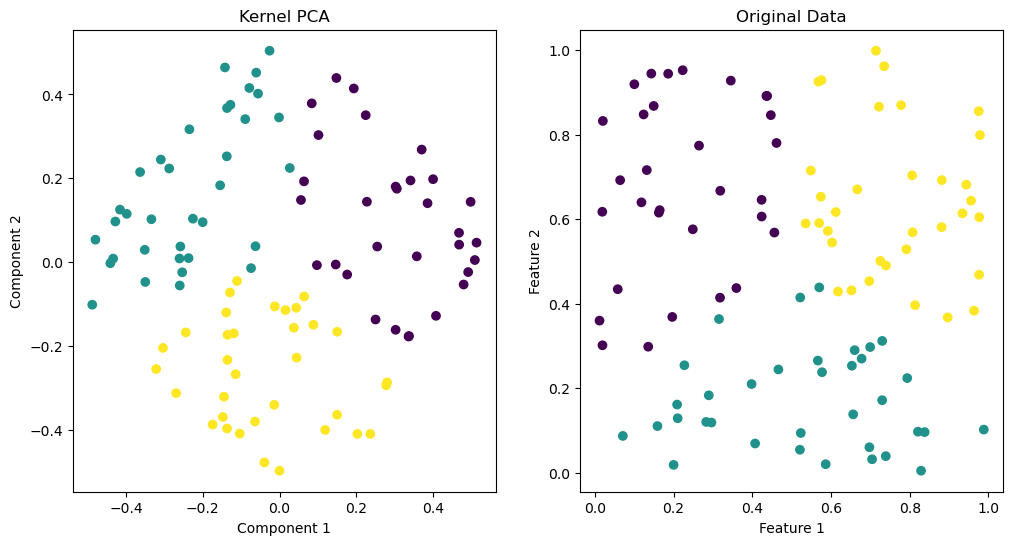

In [7]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate some synthetic data
np.random.seed(0)
X = np.random.rand(100, 2)

# Define the RBF Kernel function
def rbf_kernel(X, Y=None, gamma=1.0):
    if Y is None:
        Y = X
    K = np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2)**2)
    return K

# Compute Kernel Matrix
gamma = 0.5
K = rbf_kernel(X, gamma=gamma)

# Kernel PCA
kpca = KernelPCA(kernel='rbf', gamma=gamma)
X_kpca = kpca.fit_transform(X)

# Kernel K-Means Clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_kpca)
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(12, 6))

# Plot Kernel PCA Results
plt.subplot(1, 2, 1)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Kernel PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Plot Original Data
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


## Applications of Nonlinear Kernel Functions in SVMs

Support Vector Machines (SVMs) can be extended to handle nonlinear decision boundaries using various kernel functions. Below are some widely used types of kernel functions in SVMs:

### 1. Linear Kernel

The **Linear SVM** uses the linear kernel function, which is defined as:

$$
K(x, x_k) = \langle x, x_k \rangle = x^T x_k
$$

where \( \langle x, x_k \rangle \) denotes the dot product of the vectors \( x \) and \( x_k \).

### 2. Polynomial Kernel

The **Polynomial SVM** uses the polynomial kernel of degree \( d \), which is given by:

$$
K(x, x_k) = (\langle x, x_k \rangle + 1)^d
$$

where \( \langle x, x_k \rangle \) is the dot product, and \( d \) is the degree of the polynomial.

### 3. Radial Basis Function (RBF) Kernel

The **Radial Basis Function (RBF) SVM** includes:

- **Gaussian Radial Basis Function**:

$$
K(x, x_k) = \exp \left( -\frac{\|x - x_k\|^2}{2\sigma^2} \right)
$$

- **Exponential Radial Basis Function**:

$$
K(x, x_k) = \exp \left( -\frac{\|x - x_k\|}{2\sigma^2} \right)
$$

where \( \|x - x_k\| \) represents the Euclidean distance between \( x \) and \( x_k \), and \( \sigma \) is a parameter controlling the width of the kernel.

### 4. Multilayer Perceptron Kernel

The **Multilayer Perceptron (MLP) SVM** uses the multilayer perceptron kernel function, defined as:

$$
K(x, x_k) = \tanh(\rho \langle x, x_k \rangle + \theta) = \tanh(\rho x^T x_k + \theta)
$$

where \( \rho \) and \( \theta \) are the scale and offset parameters, respectively.

### 5. B-Splines Kernel

The **B-Splines SVM** utilizes the B-splines kernel function of order \( 2M + 1 \):

$$
K(x, x_k) = B_{2M+1}(\|x - x_k\|)
$$

where \( B_{2M+1} \) is the B-splines basis function of order \( 2M + 1 \), defined as:

$$
B_k(x) = \sum_{r=0}^{k} (-1)^r \binom{k+1}{r} x^{k+1-r}
$$

where \( \binom{k+1}{r} \) represents the binomial coefficient.

These kernel functions enable SVMs to handle complex decision boundaries by mapping the input features into high-dimensional feature spaces.


## Summing SVMs and Regularization

### 6. Summing Kernel Function

The **Summing SVM** uses an additive kernel function, which is defined as:

$$
K(x, x_k) = \sum_{i} K_i(x, x_k)
$$

where \( K_i \) are individual kernels. Since the sum of two positive definite functions is also positive definite, the summing kernel function ensures the resulting function remains positive definite.

### Regularized Optimization in RKHS

To address the poor generalization properties of SVMs, techniques such as regularization networks, Gaussian processes, and spline methods often involve solving a regularized optimization problem in a reproducing kernel Hilbert space \( H \):

$$
f^* = \arg \min_{f \in H} \left[ \frac{1}{l} \sum_{i=1}^l V(x_i, y_i, f) + \frac{\gamma}{2} \|f\|^2_H \right]
$$

where \( f \) is the regressor or classifier, \( V(x_i, y_i, f) \) is the loss function, and \( \gamma \) is the regularization parameter.

### Representer Theorem

The solution to the regularized optimization problem (8.2.21) was given by Kimeldorf and Wahba in 1971, known as the **Representer Theorem**:

**Theorem 8.4 (Representer Theorem for Supervised Learning)**

Given a set of \( l \) labeled examples \( \{(x_i, y_i)\}_{i=1}^l \), any solution to the optimization problem

$$
f^* = \arg \min_{f \in H} \left[ \frac{1}{l} \sum_{i=1}^l V(x_i, y_i, f) + \frac{\gamma}{2} \|f\|^2_H \right]
$$

has a representation of the form:

$$
f(x) = \sum_{j=1}^l \alpha_j K(x, x_j)
$$

where \( \{\alpha_j\}_{j=1}^l \in \mathbb{R} \) are coefficients.

Denoting \( f_i = f(x_i) = \sum_{j=1}^l \alpha_j K(x_i, x_j) \), we have:

$$
\mathbf{f} = \begin{bmatrix}
f_1 \\
\vdots \\
f_l
\end{bmatrix}
= K \alpha
$$

where \( K \) is the Gram matrix with entries \( K_{ij} = K(x_i, x_j) \), and \( \alpha \) is the vector of coefficients.

Thus, the norm squared in the RKHS \( \|f\|^2_H \) can be expressed as:

$$
\|f\|^2_H = \alpha^T K \alpha
$$

### Loss Function

Let \( \sum_{i=1}^l V(x_i, y_i, f) = \sum_{i=1}^l (y_i - \hat{f}_i)^2 = \|y - K \alpha\|^2_2 \). Substituting \( f(x) = \sum_{j=1}^l \alpha_j K(x, x_j) \) into the regularized optimization problem, the loss function becomes:

$$
L(\alpha) = (y - K \alpha)^T (y - K \alpha) + \frac{\gamma}{2} \alpha^T K \alpha
$$


## Optimal Solution for Regularized SVM Loss Function

To find the optimal solution for the regularized SVM problem, we start from the loss function:

$$
L(\alpha) = (y - K \alpha)^T (y - K \alpha) + \frac{\gamma}{2} \alpha^T K \alpha
$$

where \( K \) is the Gram matrix with entries \( K_{ij} = K(x_i, x_j) \), \( \alpha \) is the vector of coefficients, and \( \gamma \) is the regularization parameter.

### Gradient of the Loss Function

The gradient of the loss function \( L(\alpha) \) with respect to \( \alpha \) is:

$$
\frac{\partial L(\alpha)}{\partial \alpha} = -K(y - K \alpha) + \gamma A K \alpha
$$

Setting this gradient to zero to find the optimal solution:

$$
-K(y - K \alpha) + \gamma A K \alpha = 0
$$

### Solving for Optimal Coefficients

Rearranging the equation to solve for \( \alpha \):

$$
-Ky + K K \alpha + \gamma A K \alpha = 0
$$

$$
(K + \gamma A K) \alpha = Ky
$$

$$
\alpha = (K + \gamma A I)^{-1} y
$$

where \( I \) is the identity matrix.

### Connection to Tikhonov Regularization

The optimal solution:

$$
\alpha^* = (K + \gamma A I)^{-1} y
$$

is known as the Tikhonov regularization least squares solution. This demonstrates that the regularized SVM problem can be viewed as a form of Tikhonov regularization applied to least squares problems.


In [8]:
import numpy as np

class RegularizedSVM:
    def __init__(self, C=1.0, gamma=1.0):
        """
        Initialize the SVM with the regularization parameter C and the RBF kernel parameter gamma.
        """
        self.C = C
        self.gamma = gamma

    def rbf_kernel(self, X1, X2):
        """
        Compute the RBF kernel (Gaussian kernel) between X1 and X2.
        """
        if X1.ndim == 1:
            X1 = X1[:, np.newaxis]
        if X2.ndim == 1:
            X2 = X2[:, np.newaxis]
        
        sq_dists = np.sum((X1[:, np.newaxis] - X2[np.newaxis, :]) ** 2, axis=2)
        return np.exp(-self.gamma * sq_dists)

    def fit(self, X, y):
        """
        Train the SVM using the training data X and labels y.
        """
        n_samples, n_features = X.shape

        # Compute the kernel matrix
        K = self.rbf_kernel(X, X)

        # Solve for alpha using the regularized least squares solution
        P = K + self.C * np.eye(n_samples)
        q = np.ones(n_samples) * -1
        alpha = np.linalg.solve(P, q)
        
        self.alpha = alpha
        self.support_vectors_ = X
        self.support_vector_labels_ = y

    def predict(self, X):
        """
        Predict the labels for new data X.
        """
        K = self.rbf_kernel(X, self.support_vectors_)
        predictions = np.sign(K.dot(self.alpha))
        return predictions

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Create a synthetic dataset
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
    y = 2 * y - 1  # Convert to {-1, 1} labels

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the SVM
    svm = RegularizedSVM(C=1.0, gamma=0.5)
    svm.fit(X_train, y_train)

    # Make predictions
    y_pred = svm.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.53
